In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split


%matplotlib inline

In [18]:
df= pd.read_csv('NY_bike_close.csv').dropna(axis=0)
print(df)

      Unnamed: 0  start_station_id  start_station_latitude  \
0           6521              72.0               40.767272   
2          42233              82.0               40.711174   
3          56934              83.0               40.683826   
4          78536             116.0               40.741776   
5          93334             119.0               40.696089   
6         111430             120.0               40.686768   
7         132640             127.0               40.731724   
8         150624             128.0               40.727103   
9         164708             143.0               40.692395   
10        184509             144.0               40.698399   
12        222733             150.0               40.720874   
13        240877             151.0               40.722104   
14        255196             157.0               40.690893   
15        276998             161.0               40.729170   
16        295193             164.0               40.753231   
17      

In [19]:
#charts: correlation heatmap,histogram number of rides vs station, station vs borough, look at coursework and follow
# along with the coursework to do on here, feature engineering, linear regression, random forest

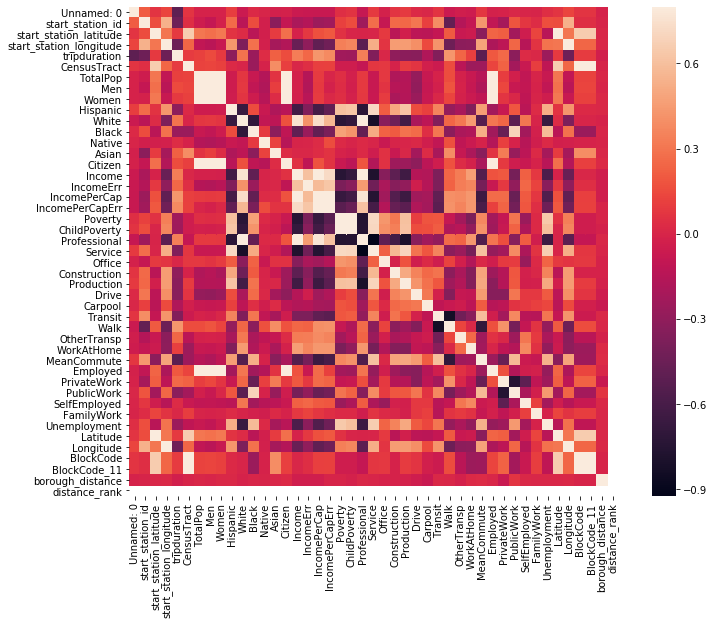

In [20]:
corrmat = df.corr()


f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [21]:
x=df[['borough_distance','TotalPop','Men','Women','Income','Poverty','start_station_id','Drive','Carpool','Walk','OtherTransp',
     'WorkAtHome','MeanCommute','Employed','Unemployment','PrivateWork','PublicWork','SelfEmployed','FamilyWork', 'tripduration']].dropna(axis=0)

y=df['tripduration'].dropna

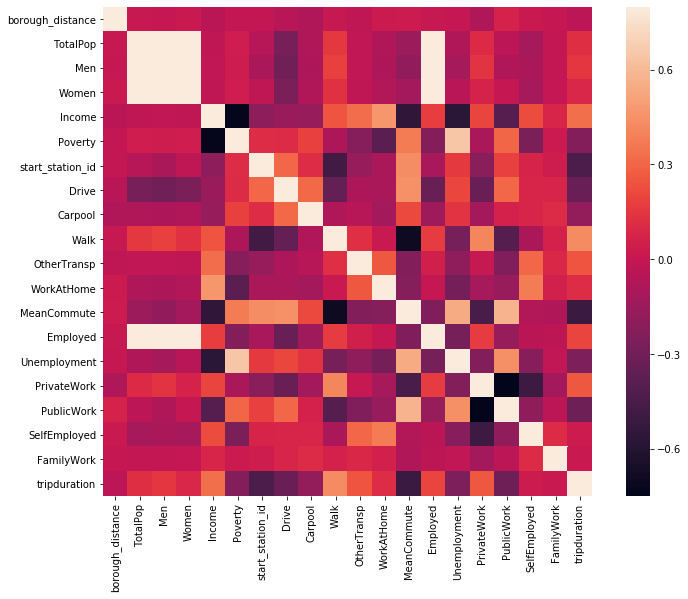

In [22]:
corrmat=x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [23]:
#combine carpool+OtherTransp, keep drive, walk, drop meancommute, do percentage of men from totalpop, 

Text(0, 0.5, 'Frequency')

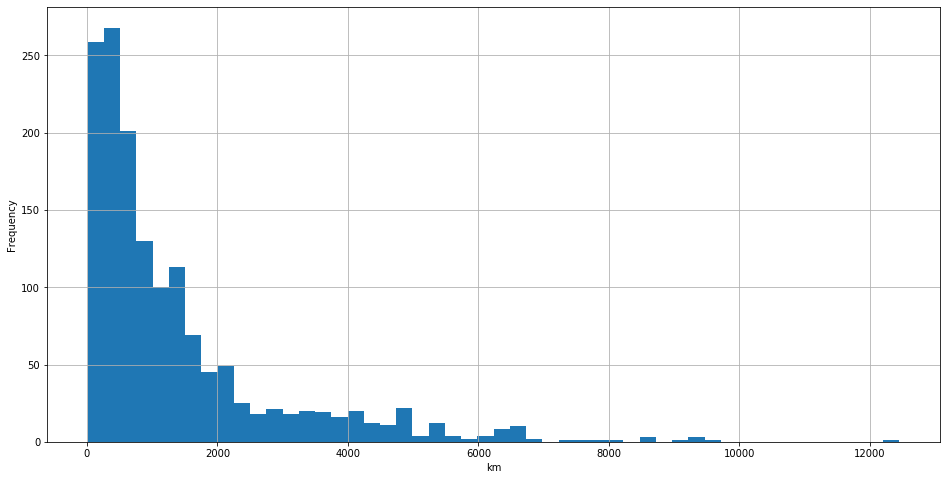

In [24]:
plt.figure(figsize=(16, 8))
df.tripduration.hist( bins=50)
plt.xlabel("km")
plt.ylabel('Frequency')

In [25]:
df['log_tripcount']=np.log(df.tripduration)

Text(0, 0.5, 'total trips')

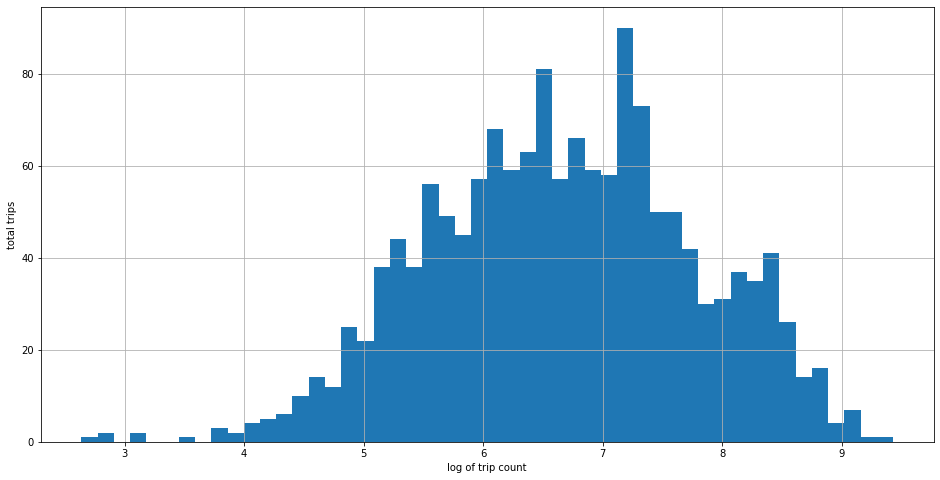

In [26]:
plt.figure(figsize=(16, 8))
df.log_tripcount.hist( bins=50)
plt.xlabel("log of trip count")
plt.ylabel('total trips')

In [27]:
#remove datapoint at 0, basic models to start- linear regressions, random forest, etc and then work on features to improve 
#prediction rate

In [12]:
#create powerpoint with shell for each slide to show what you will be predicting on that slide

In [40]:
y=df.log_tripcount
X=df[['borough_distance','TotalPop','Men','Women','Income','Poverty','start_station_id','Drive','Carpool','Walk','OtherTransp',
     'WorkAtHome','Employed','Unemployment','PrivateWork','PublicWork','SelfEmployed','FamilyWork', 'tripduration']]
(X_train, X_test, y_train, y_test)=train_test_split(X,y,test_size=0.25)
lr=LinearRegression()

In [41]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr.score(X_test,y_pred)
mean_squared_error(y_test,y_pred)

0.33714636567973316

R-squared regression: 0.7609914225461788
R-squared PLSR: 0.7600358958945156


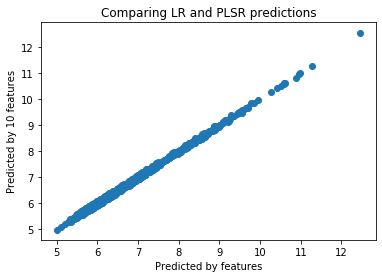

In [52]:
from sklearn.cross_decomposition import PLSRegression

regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))


pls1 = PLSRegression(n_components=10)


pls1.fit(X, y)


Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))


plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by features')
plt.ylabel('Predicted by 10 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression



In [70]:
pd.get_dummies(df)
df.head(5)

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,tripduration,tmp,CensusTract,County_x,Borough,TotalPop,...,Unemployment,Latitude,Longitude,BlockCode,County_y,State,BlockCode_11,borough_distance,distance_rank,log_tripcount
0,6521,72.0,40.767272,-73.993929,3607,tmp,36061013500,New York,Manhattan,6384,...,5.7,40.767186,-73.995075,360610135002005,New York,NY,36061013500,0.097058,1.0,8.190632
2,42233,82.0,40.711174,-74.000165,1214,tmp,36061002900,New York,Manhattan,6050,...,3.3,40.710653,-74.001407,360610029004022,New York,NY,36061002900,0.119646,1.0,7.101676
3,56934,83.0,40.683826,-73.976323,1623,tmp,36047012901,Kings,Brooklyn,2577,...,5.7,40.683518,-73.976080,360470129011002,Kings,NY,36047012901,0.039960,1.0,7.392032
4,78536,116.0,40.741776,-74.001497,5761,tmp,36061008300,New York,Manhattan,3929,...,11.3,40.742312,-74.001407,360610083001000,New York,NY,36061008300,0.060052,1.0,8.658866
5,93334,119.0,40.696089,-73.978034,454,tmp,36047021100,Kings,Brooklyn,1362,...,9.2,40.697085,-73.979246,360470211001001,Kings,NY,36047021100,0.150738,1.0,6.118097


In [71]:
regr = ensemble.RandomForestRegressor()
X = df.drop('log_tripcount', 1)
Y = df['log_tripcount']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

print(regr.feature_importances_)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.